In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

print("Setup Complete")

Setup Complete


In [2]:
legend_filepath = "./hs_legend.csv"
legend_data = pd.read_csv(legend_filepath)
legend_data.head()

,Season,Year,Month,Server,Number
0,108,2022,10,AP,7810
1,108,2022,10,US,10407
2,108,2022,10,EU,16533
3,109,2022,11,AP,6745
4,109,2022,11,US,10260


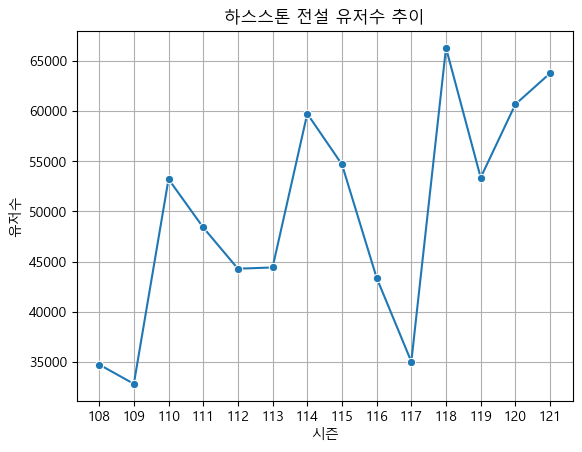

In [3]:
# 각 시즌 및 서버에 대한 유저 수 총합 계산
total_user = legend_data.groupby(['Season']).Number.sum().reset_index()

# Season을 x축으로, Number를 y축으로 하는 선 그래프 그리기
sns.lineplot(data=total_user, x='Season', y='Number', marker='o')

# 그래프 제목과 레이블 추가
plt.title('하스스톤 전설 유저수 추이')
plt.xlabel('시즌')
plt.ylabel('유저수')

# 그리드 추가
plt.xticks(range(108,122))
plt.grid(True)

# 그래프 표시
plt.show()

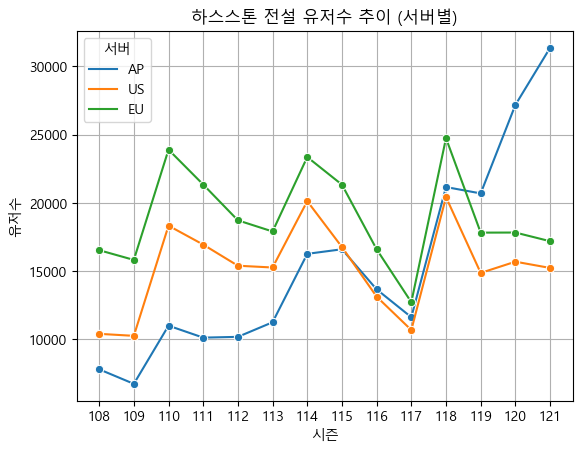

In [4]:
# Season을 x축으로, Number를 y축으로 하는 선 그래프 그리기
sns.lineplot(data=legend_data, x='Season', y='Number', hue='Server', marker='o')

# 서버 이름을 라벨로 바꾸기
server_labels = {'AP': '아시아', 'EU': '유럽', 'US': '아메리카'}
legend_data['Server'] = legend_data['Server'].map(server_labels)

# 그래프 제목과 레이블 추가
plt.title('하스스톤 전설 유저수 추이 (서버별)')
plt.xlabel('시즌')
plt.ylabel('유저수')

# 범례 추가
plt.legend(title='서버')

# 그리드 추가
plt.xticks(range(108,122))
plt.grid(True)

# 그래프 표시
plt.show()

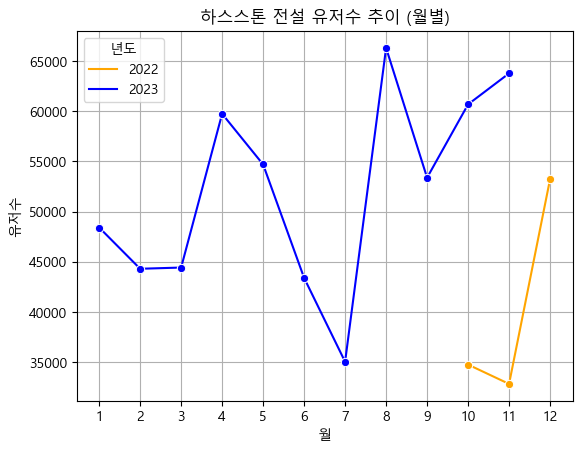

In [5]:
# 각 시즌 및 서버에 대한 유저 수 총합 계산
total_user3 = legend_data.groupby(['Season','Year','Month']).Number.sum().reset_index()

# 사용할 색상 리스트
colors = {2022 : 'orange', 2023 : 'blue'}

# Month x축으로, Number를 y축으로 하고 Year에 따른 선 그래프 그리기
sns.lineplot(data=total_user3, x='Month', y='Number', hue='Year', marker='o', palette=colors)

# 그래프 제목과 레이블 추가
plt.title('하스스톤 전설 유저수 추이 (월별)')
plt.xlabel('월')
plt.ylabel('유저수')
plt.legend(title='년도')

# 그리드 추가
plt.xticks(range(1,13))
plt.grid(True)

# 그래프 표시
plt.show()

In [6]:
# '날짜' 열을 생성하고 정렬
legend_data['Time'] = pd.to_datetime(legend_data[['Year', 'Month']].astype(str).agg('-'.join, axis=1))
# 일자 부분 삭제
legend_data['Time'] = legend_data['Time'].dt.to_period("M")

# 각 시즌 및 서버에 대한 유저 수 총합 계산
total_user3 = legend_data.groupby(['Season', 'Time']).Number.sum().reset_index()
print(total_user3)

# 확장팩 발매 월과 이전 월 dict 생성
expansion_release = {
    '리치왕의진군': ('2022-12', '2022-11'),
    '전설노래자랑': ('2023-04', '2023-03'),
    '티탄': ('2023-08', '2023-07'),
    '황야의땅결투': ('2023-11', '2023-10')
}
expansion_data = pd.DataFrame(columns=['Expansion', 'Release_Month', 'Previous_Month', 'User_Difference'])

    Season     Time  Number
0      108  2022-10   34750
1      109  2022-11   32825
2      110  2022-12   53226
3      111  2023-01   48411
4      112  2023-02   44300
5      113  2023-03   44422
6      114  2023-04   59742
7      115  2023-05   54694
8      116  2023-06   43391
9      117  2023-07   35033
10     118  2023-08   66308
11     119  2023-09   53376
12     120  2023-10   60683
13     121  2023-11   63773


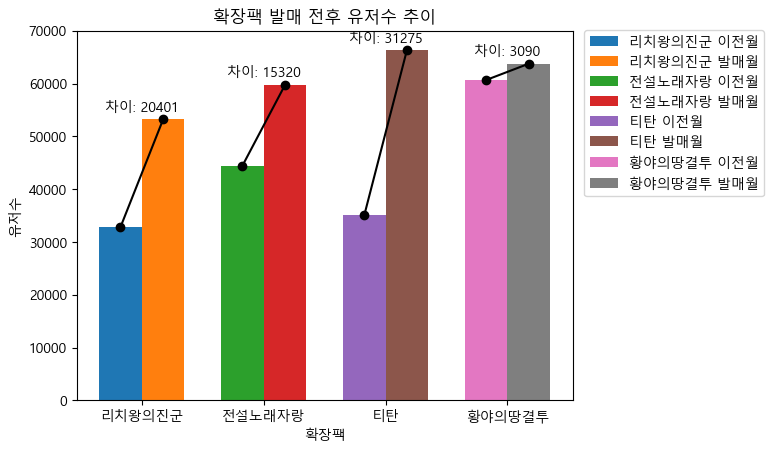

In [7]:
import numpy as np

bar_width = 0.35 # 막대 너비
expansion_index = np.arange(len(expansion_release)) # 확장팩 인덱스

# 각 확장팩에 대해 데이터 추출 및 그래프 그리기
for i, (expansion, (release_month, previous_month)) in enumerate(expansion_release.items()):
    release_data = total_user3[total_user3['Time'].astype(str) == release_month]
    previous_data = total_user3[total_user3['Time'].astype(str) == previous_month]

    if not release_data.empty and not previous_data.empty:
        # 확장팩 발매 월과 이전 월의 유저 수 데이터 추출
        release_users = release_data['Number'].sum()
        previous_users = previous_data['Number'].sum()

        # 막대 그래프 그리기
        plt.bar(expansion_index[i] - bar_width/2, previous_users, bar_width, label=f'{expansion} 이전월')
        plt.bar(expansion_index[i] + bar_width/2, release_users, bar_width, label=f'{expansion} 발매월')

        # 선 그래프 그리기
        plt.plot([expansion_index[i] - bar_width / 2, expansion_index[i] + bar_width / 2],
                 [previous_users, release_users], marker='o', color='black')
        # 차이값 표시
        plt.text(expansion_index[i], max(previous_users, release_users) + 1000,
                 f'차이: {release_users - previous_users}', ha='center', va='bottom')
        
# 그래프 제목과 레이블 추가
plt.title('확장팩 발매 전후 유저수 추이')
plt.xlabel('확장팩')
plt.ylabel('유저수')
plt.xticks(expansion_index, expansion_release.keys())
plt.ylim(0,70000)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.02))
plt.show()